# Weather


### Import Library

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Read data

In [33]:
df_2015 = pd.read_csv('../assets/2015.csv')
df_2016 = pd.read_csv('../assets/2016.csv')
df_2017 = pd.read_csv('../assets/2017.csv')
df_2018 = pd.read_csv('../assets/2018.csv')
df_2019 = pd.read_csv('../assets/2019.csv')
df_2020 = pd.read_csv('../assets/2020.csv')
df_2021 = pd.read_csv('../assets/2021.csv')
df_2022 = pd.read_csv('../assets/2022.csv')
df_2023 = pd.read_csv('../assets/2023.csv')
df_2024 = pd.read_csv('../assets/2024.csv')

df = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023, df_2024], ignore_index=True, axis=0)
df.describe()
df.head(5)

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,"Hồ Chí Minh, Việt Nam",2015-12-01T00:00:00,27.4,30.3,23.0,76.92,0.0,0,NaN,0.0,0,6.1,7.0,100.0,1012.0,50.0,10.0,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"48900099999,VVTS"
1,"Hồ Chí Minh, Việt Nam",2015-12-01T01:00:00,26.9,29.2,22.2,75.53,0.0,0,NaN,0.0,0,6.8,7.7,100.0,1011.3,49.1,10.9,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"48894099999,48900099999,VVTS"
2,"Hồ Chí Minh, Việt Nam",2015-12-01T02:00:00,27.0,29.6,23.0,78.78,0.0,0,NaN,0.0,0,8.6,8.6,106.0,1011.0,50.0,10.0,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"48900099999,VVTS"
3,"Hồ Chí Minh, Việt Nam",2015-12-01T03:00:00,27.0,29.6,23.0,78.78,0.0,0,NaN,0.0,0,7.6,10.4,102.0,1010.0,50.0,10.0,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"48900099999,VVTS"
4,"Hồ Chí Minh, Việt Nam",2015-12-01T04:00:00,26.6,26.6,23.1,81.56,0.0,0,NaN,0.0,0,6.8,7.7,110.0,1011.0,52.8,10.9,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"48894099999,48900099999,VVTS"


### Processing data

In [34]:
# Drop column can do model bias
df = df.drop(['name', 'precip', 'precip', 'preciptype', 'snow', 'snowdepth', 'icon', 'severerisk','stations','precipprob'], axis=1)
df.head(5)

,datetime,temp,feelslike,dew,humidity,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions
0,2015-12-01T00:00:00,27.4,30.3,23.0,76.92,6.1,7.0,100.0,1012.0,50.0,10.0,0.0,0.0,0,Partially cloudy
1,2015-12-01T01:00:00,26.9,29.2,22.2,75.53,6.8,7.7,100.0,1011.3,49.1,10.9,0.0,0.0,0,Partially cloudy
2,2015-12-01T02:00:00,27.0,29.6,23.0,78.78,8.6,8.6,106.0,1011.0,50.0,10.0,0.0,0.0,0,Partially cloudy
3,2015-12-01T03:00:00,27.0,29.6,23.0,78.78,7.6,10.4,102.0,1010.0,50.0,10.0,0.0,0.0,0,Partially cloudy
4,2015-12-01T04:00:00,26.6,26.6,23.1,81.56,6.8,7.7,110.0,1011.0,52.8,10.9,0.0,0.0,0,Partially cloudy


In [41]:
df.to_csv('../assets/weather_hours.csv', index=False)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34296 entries, 0 to 34295
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          34296 non-null  object 
 1   temp              34296 non-null  float64
 2   feelslike         34296 non-null  float64
 3   dew               34296 non-null  float64
 4   humidity          34296 non-null  float64
 5   windgust          34295 non-null  float64
 6   windspeed         34296 non-null  float64
 7   winddir           34296 non-null  float64
 8   sealevelpressure  34296 non-null  float64
 9   cloudcover        34296 non-null  float64
 10  visibility        34270 non-null  float64
 11  solarradiation    34296 non-null  float64
 12  solarenergy       34296 non-null  float64
 13  uvindex           34296 non-null  int64  
 14  conditions        34296 non-null  object 
dtypes: float64(12), int64(1), object(2)
memory usage: 3.9+ MB


In [37]:
df.shape

(34296, 15)

In [38]:
df.describe()

,temp,feelslike,dew,humidity,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex
count,34296.000000,34296.000000,34296.000000,34296.000000,34295.000000,34296.000000,34296.000000,34296.000000,34296.000000,34270.000000,34296.000000,34296.000000,34296.000000
mean,28.393565,31.677493,23.478726,76.770243,17.255454,9.520204,178.246072,1009.441594,55.289952,9.604208,218.400665,0.785611,2.174510
std,2.998424,5.406034,2.721007,16.467828,9.589131,5.428468,96.959053,2.446985,22.797934,1.429959,300.251965,1.081643,3.016234
min,18.000000,18.000000,9.000000,22.800000,0.400000,0.000000,0.000000,1000.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,26.000000,26.000000,22.000000,65.350000,9.700000,5.400000,110.000000,1008.000000,48.100000,9.100000,0.000000,0.000000,0.000000
50%,28.000000,31.800000,24.000000,79.060000,15.800000,9.200000,170.000000,1009.100000,50.000000,10.000000,7.000000,0.000000,0.000000
75%,30.600000,35.600000,25.100000,89.110000,23.000000,13.000000,253.000000,1011.000000,84.200000,10.000000,422.000000,1.500000,4.000000
max,39.000000,48.700000,29.000000,100.000000,216.000000,50.000000,360.000000,1019.000000,100.000000,24.100000,1046.000000,3.800000,10.000000


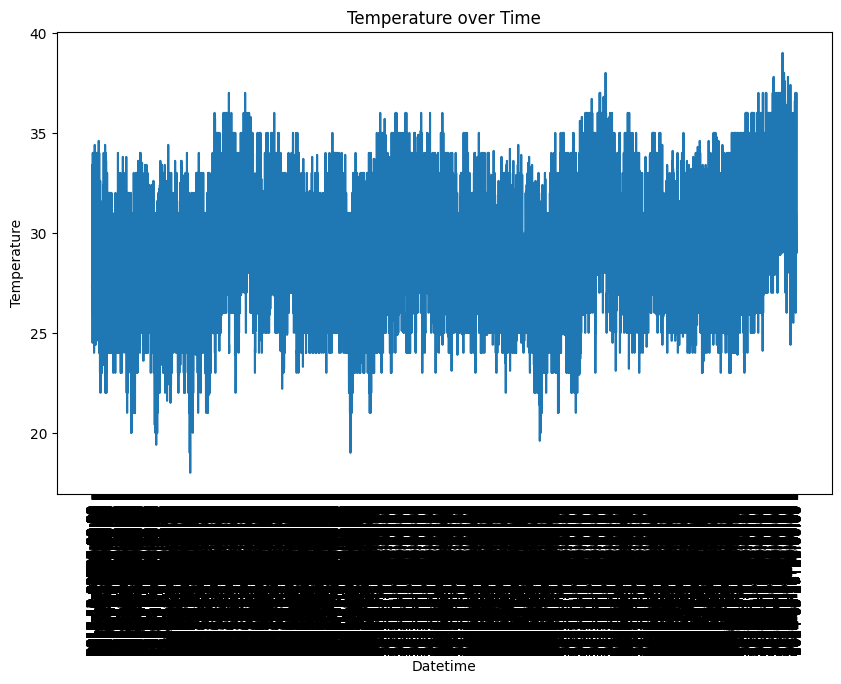

In [39]:
plt.figure(figsize=(10,6))
plt.plot(df['datetime'], df['temp'])
plt.title('Temperature over Time')
plt.xlabel('Datetime')
plt.ylabel('Temperature')
plt.xticks(rotation=90)
plt.show()

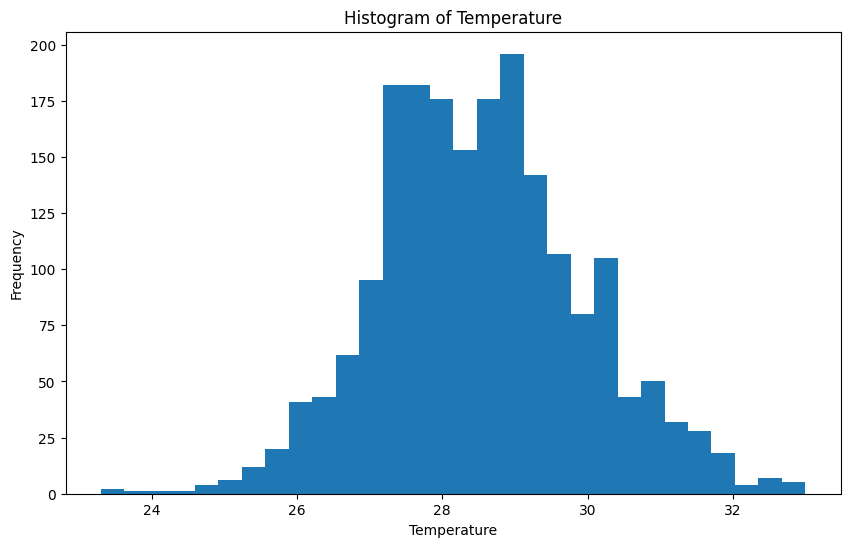

In [10]:
plt.figure(figsize=(10,6))
plt.hist(df['temp'], bins=30)
plt.title('Histogram of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

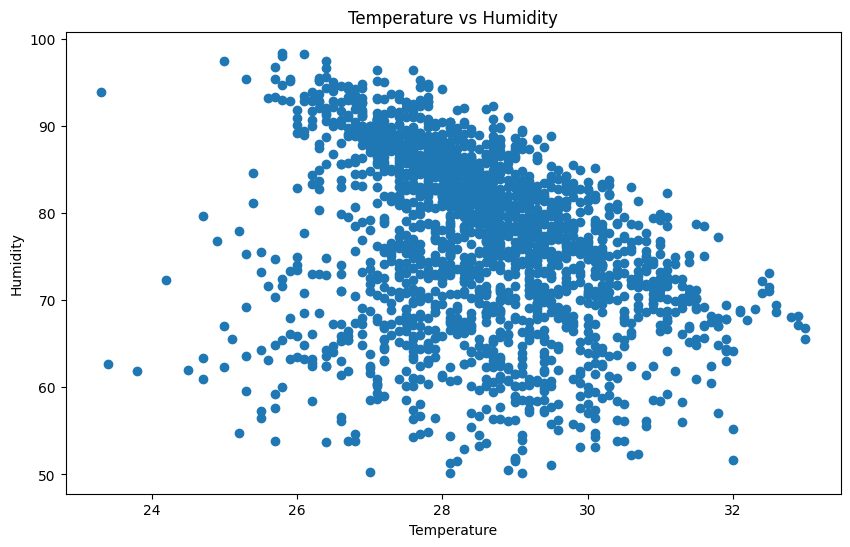

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(df['temp'], df['humidity'])
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()

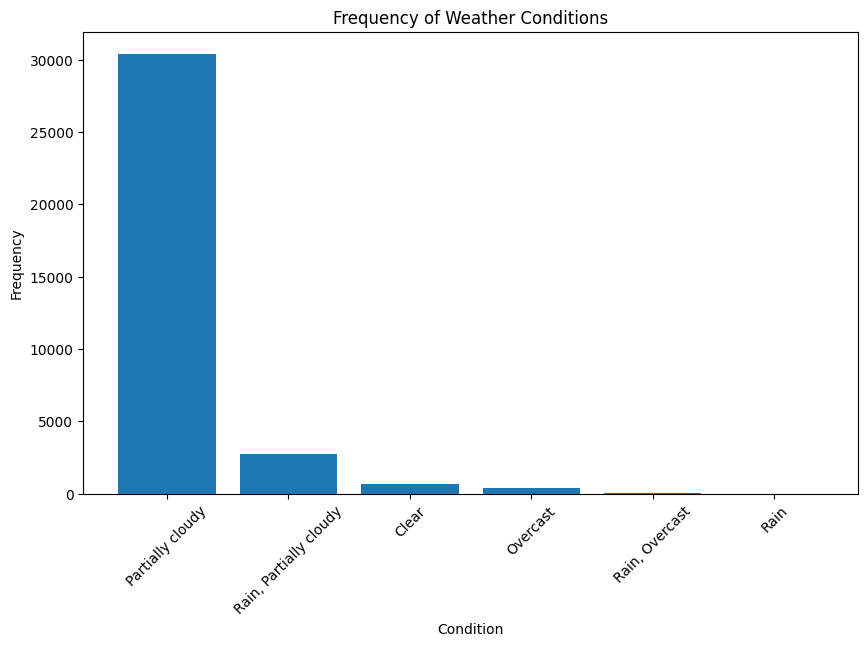

In [40]:
condition_counts = df['conditions'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(condition_counts.index, condition_counts.values)
plt.title('Frequency of Weather Conditions')
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

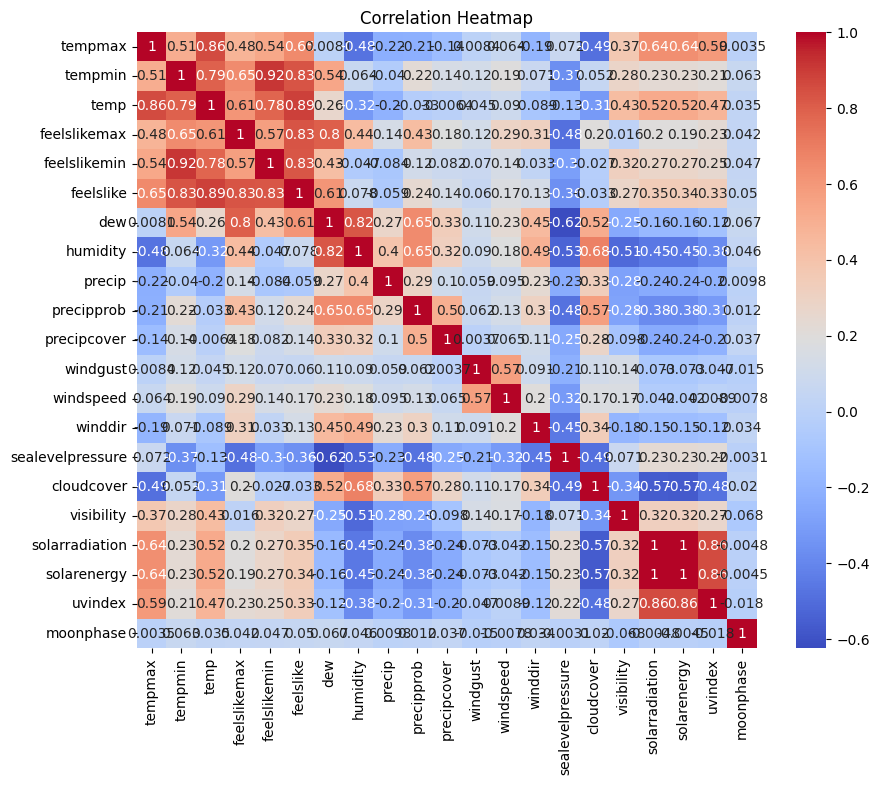

In [18]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()

# Create the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()